<font style="font-size:28px;" align="left"><b> Fázis visszahatás </b></font>

A fázis visszahatás effektusa arra az érdekes jelensége mutat rá, hogy CNOT kapu a kontroll qubit állapotát is meg tudja változtatni, nem csak a target qubitét. Ez azért meglepő, mivel a klasszikusan a CNOT kapu csak a target qubit állapotát változtatja meg. ($\ket{0}\rightarrow \ket{1}$ és $\ket{1}\rightarrow \ket{0}$ ha a kontroll qubit állapota $\ket{1}$.)

1. Feladat:

    Hozzatok létre egy kvantumáramkört 2 kvantumbittel, legyenek ezek q[1] és q[0]!
    
    Kezdetben a kvantumbitek legyenek a $\ket{01}$ állapotban, azaz inicializáljátok a
    - q[1] kvantumbitet a $\ket{0}$ állapotba
    - q[0] kvantumbitet pedig a $\ket{1}$ állapotba.

    Alkalmazzatok egy-egy Hadamard kaput mindkét kvantumbiten!

    Alkalmazzatok egy CNOT kaput úgy, hogy a q[1] a kontroll qubit és q[0] a target qubit!

    Ismét alkalmazzatok egy-egy Hadamard kaput mindkét kvantumbiten!

    Mérjétek meg a kvantumbiteket és értelmezzétek az eredményt!

    Számolással igazoljátok a kapott eredményt!


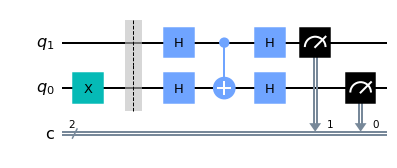

{'11': 100}


In [6]:
import qiskit as qt

q = qt.QuantumRegister(2,'q')
c = qt.ClassicalRegister(2,'c')
qc = qt.QuantumCircuit(q,c)

qc.x(q[0])
qc.barrier()

qc.h(q[0])
qc.h(q[1])

qc.cx(q[1],q[0])

qc.h(q[0])
qc.h(q[1])

qc.measure(q[1],c[1])
qc.measure(q[0],c[0])

display(qc.draw(output='mpl',reverse_bits=True))

job = qt.execute(qc,qt.Aer.get_backend('qasm_simulator'),shots=100)
counts = job.result().get_counts(qc)
print(counts)

2. Feladat

    Hozzatok létre egy kvantumáramkört 7 kvantumbittel, ezek legyenek rendre q[6],q[5],q[4],q[3],q[2],q[1],q[0]!

    Kezdetben a kvantumbitek legyenek a $\ket{0000001}$ állapotban.

    Alkalmazzatok Hadamard kaput az összes kvantumbiten!

    Alkalmazzatok 6 db CNOT kaput úgy, hogy a kontroll qubitek minden CNOT kapu esetén rendre a q[1],q[2],q[3],q[4],q[5],q[6] qubitek legyenek, a target qubit pedig mindig a q[0] qubit legyen!

    Ismét alkalmazzatok Hadamard kapukat az összes kvantumbiten!

    Mérjétek meg a kvantumbiteket és értelmezzétek az eredményt! 

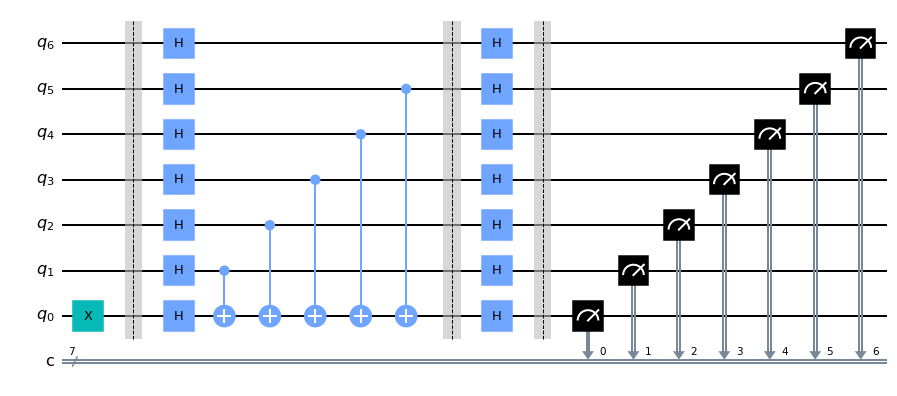

{'0111111': 100}


In [10]:
q = qt.QuantumRegister(7,'q')
c = qt.ClassicalRegister(7,'c')
qc = qt.QuantumCircuit(q,c)

qc.x(q[0])
qc.barrier()

for i in range(7):
    qc.h(q[i])

for i in range(5):
    qc.cx(q[i+1],q[0])

qc.barrier()

for i in range(7):
    qc.h(q[i])

qc.barrier()

qc.measure(q,c)

display(qc.draw(output='mpl',reverse_bits=True))

job = qt.execute(qc,qt.Aer.get_backend('qasm_simulator'),shots=100)
counts = job.result().get_counts(qc)
print(counts)

3. Feladat

    Nézzétek meg mi történik, ha bizonyos CNOT kapukat kihagytok az áramkörből!

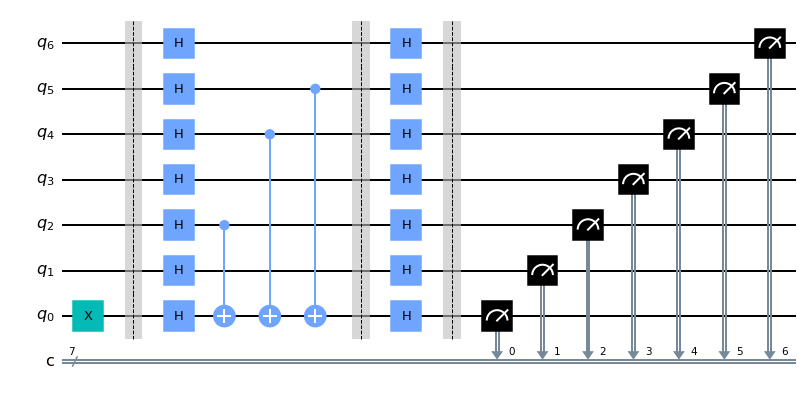

{'0110101': 100}


In [12]:
q = qt.QuantumRegister(7,'q')
c = qt.ClassicalRegister(7,'c')
qc = qt.QuantumCircuit(q,c)

qc.x(q[0])
qc.barrier()

for i in range(7):
    qc.h(q[i])

qc.cx(q[2],q[0])
qc.cx(q[4],q[0])
qc.cx(q[5],q[0])

qc.barrier()

for i in range(7):
    qc.h(q[i])

qc.barrier()

qc.measure(q,c)

display(qc.draw(output='mpl',reverse_bits=True))

job = qt.execute(qc,qt.Aer.get_backend('qasm_simulator'),shots=100)
counts = job.result().get_counts(qc)
print(counts)

4. Feladat

    Igazoljátok, hogy az alábbi két áramkör ekvivalens!
    (Mutássotok meg, hogy minden bázisállapoton ugyanúgy hatnak.)
    

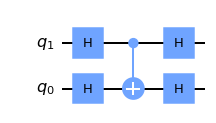

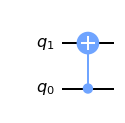

In [15]:
q = qt.QuantumRegister(2,'q')
qc = qt.QuantumCircuit(q)

qc.h(q)
qc.cx(1,0)
qc.h(q)

display(qc.draw(output='mpl',reverse_bits=True))

q2 = qt.QuantumRegister(2,'q')
qc2 = qt.QuantumCircuit(q2)

qc2.cx(0,1)

display(qc2.draw(output='mpl',reverse_bits=True))